<a href="https://colab.research.google.com/github/faranak5171/Deep-Learning-projects/blob/master/Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import nn

import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = datasets.CIFAR10('data', download=True, train=True, transform=transform)
testset = datasets.CIFAR10('data', download=True, train=False, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
val_size = 0.2
num_indices = len(trainset)
indices = list(range(num_indices))
np.random.shuffle(indices)
val_index = int(val_size*num_indices)
train_idx, val_idx = indices[val_index:], indices[:val_index]

train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64)

In [4]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

Images shape:torch.Size([3, 32, 32])


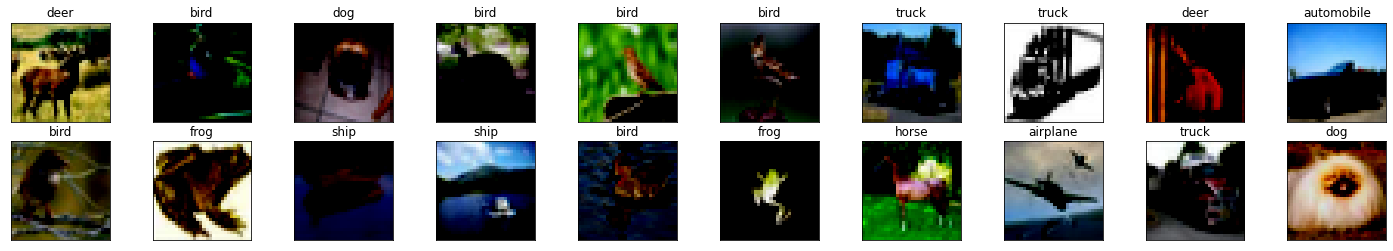

In [8]:
images, labels = next(iter(trainloader))
print(f"Images shape:{images[0].shape}")
fig = plt.figure(figsize=(25,4))
for idx in range(20):
  ax = fig.add_subplot(2,10,idx+1, xticks=[], yticks=[])
  plt.imshow(utils.make_grid(images[idx]).permute(1,2,0))
  ax.set_title(classes[labels[idx]])
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
class network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
    self.conv3 = nn.Conv2d(32, 64, 3, padding=1)

    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear()

  def forward(self,x):
    # Input tensor in the shape of (3,32,32)
     nn.ReLU(self.conv1(x))

In [ ]:
device = "CUDA" if torch.cuda.is_available() else "CPU"

'CUDA'